<a href="https://colab.research.google.com/github/jovanadobreva/Environmental-Impact-Plant-Based-Diets/blob/main/Clustering_Food_Products_%26_Scenarios_for_Gas_emission_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLUSTERING

In [ ]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("/content/Food_Production.csv")

In [ ]:
dataset.isna().sum()

Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)       

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [ ]:
dataset.dropna(axis=0)

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.60,5.846154,18786.2,14450.923080,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.80,3.943662,49576.3,69825.774650,13449.891480
5,Potatoes,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.754098,...,347.647059,59.1,0.628415,2.705882,1.202186,0.88,5.176471,2754.2,16201.176470,3762.568306
11,Nuts,-2.1,0.0,2.1,0.0,0.1,0.1,0.0,0.2,3.113821,...,2531.414574,4133.8,0.069919,0.263319,2.107317,12.96,7.936314,229889.8,140777.587300,37380.455280
12,Groundnuts,0.4,0.0,1.4,0.4,0.1,0.1,0.0,2.4,2.437931,...,707.524828,1852.3,0.556897,1.233766,1.570690,9.11,3.479756,61797.9,23605.003820,10654.810340
20,Tomatoes,0.4,0.0,0.7,0.0,0.2,0.1,0.0,1.4,39.526316,...,3361.818182,369.8,11.000000,19.000000,4.210526,0.80,7.272727,5335.7,48506.363640,28082.631580
21,Onions & Leeks,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,8.756757,...,110.000000,14.3,1.351351,3.846154,1.054054,0.39,3.000000,932.0,7169.230769,2518.918919
22,Root Vegetables,0.0,0.0,0.2,0.0,0.1,0.0,0.0,0.3,4.351351,...,284.000000,28.4,1.162162,4.300000,0.891892,0.33,3.300000,929.2,9292.000000,2511.351351
23,Brassicas,0.0,0.0,0.3,0.0,0.1,0.0,0.0,0.4,29.470588,...,1085.454545,119.4,3.000000,4.636364,3.235294,0.55,5.000000,8455.1,76864.545450,49735.882350
25,Citrus Fruit,-0.1,0.0,0.3,0.0,0.1,0.0,0.0,0.3,7.000000,...,1378.333333,82.7,1.218750,6.500000,2.687500,0.86,14.333333,4662.7,77711.666670,14570.937500


In [ ]:
dataset.fillna(method='ffill',inplace=True)
dataset.fillna(method='bfill',inplace=True)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(dataset['Food product'])
dataset['Food product'] = le.transform(dataset['Food product'])
pca = PCA(2)
df_new = pca.fit_transform(dataset)

In [ ]:
le_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))
le_name_mapping

{0: 'Apples',
 1: 'Bananas',
 2: 'Barley (Beer)',
 3: 'Beef (beef herd)',
 4: 'Beef (dairy herd)',
 5: 'Beet Sugar',
 6: 'Berries & Grapes',
 7: 'Brassicas',
 8: 'Cane Sugar',
 9: 'Cassava',
 10: 'Cheese',
 11: 'Citrus Fruit',
 12: 'Coffee',
 13: 'Dark Chocolate',
 14: 'Eggs',
 15: 'Fish (farmed)',
 16: 'Groundnuts',
 17: 'Lamb & Mutton',
 18: 'Maize (Meal)',
 19: 'Milk',
 20: 'Nuts',
 21: 'Oatmeal',
 22: 'Olive Oil',
 23: 'Onions & Leeks',
 24: 'Other Fruit',
 25: 'Other Pulses',
 26: 'Other Vegetables',
 27: 'Palm Oil',
 28: 'Peas',
 29: 'Pig Meat',
 30: 'Potatoes',
 31: 'Poultry Meat',
 32: 'Rapeseed Oil',
 33: 'Rice',
 34: 'Root Vegetables',
 35: 'Shrimps (farmed)',
 36: 'Soybean Oil',
 37: 'Soymilk',
 38: 'Sunflower Oil',
 39: 'Tofu',
 40: 'Tomatoes',
 41: 'Wheat & Rye (Bread)',
 42: 'Wine'}

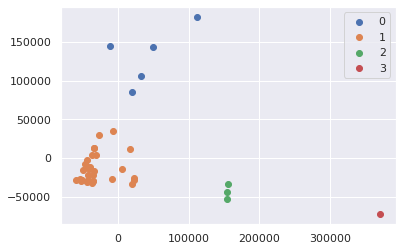

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(df_new)
u_labels = np.unique(label)
labels = kmeans.labels_

for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
le.inverse_transform(dataset['Food product'])

array(['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal',
       'Rice', 'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar',
       'Other Pulses', 'Peas', 'Nuts', 'Groundnuts', 'Soymilk', 'Tofu',
       'Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil',
       'Olive Oil', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables',
       'Brassicas', 'Other Vegetables', 'Citrus Fruit', 'Bananas',
       'Apples', 'Berries & Grapes', 'Wine', 'Other Fruit', 'Coffee',
       'Dark Chocolate', 'Beef (beef herd)', 'Beef (dairy herd)',
       'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese',
       'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'], dtype=object)

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = dataset.index.values
cluster_map['food_product'] = le.inverse_transform(dataset['Food product'])
cluster_map['cluster'] = kmeans.labels_
cluster_map.head()

,data_index,food_product,cluster
0,0,Wheat & Rye (Bread),0
1,1,Maize (Meal),0
2,2,Barley (Beer),0
3,3,Oatmeal,0
4,4,Rice,0


In [ ]:
num_clusters = 4
for i in range(num_clusters):
  print(cluster_map[cluster_map.cluster == i])

    data_index      food_product  cluster
28          28  Berries & Grapes        0
29          29              Wine        0
30          30       Other Fruit        0
    data_index         food_product  cluster
0            0  Wheat & Rye (Bread)        1
1            1         Maize (Meal)        1
2            2        Barley (Beer)        1
3            3              Oatmeal        1
4            4                 Rice        1
5            5             Potatoes        1
6            6              Cassava        1
7            7           Cane Sugar        1
8            8           Beet Sugar        1
9            9         Other Pulses        1
10          10                 Peas        1
12          12           Groundnuts        1
13          13              Soymilk        1
14          14                 Tofu        1
15          15          Soybean Oil        1
16          16             Palm Oil        1
17          17        Sunflower Oil        1
18          18        

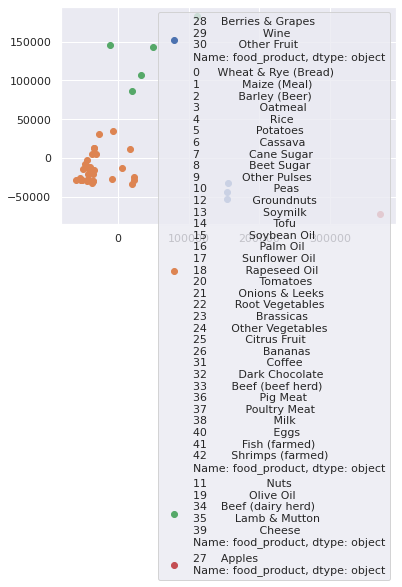

In [ ]:
for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = cluster_map[cluster_map.cluster == i]['food_product'])
plt.legend()
plt.show()

In [ ]:
!pip install adjustText

  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=61d31e029d2d24b50e6e428fb321ab009f5e84910b54ac24a3765dff612b32a2
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built adjustText


Adjusting texts ...


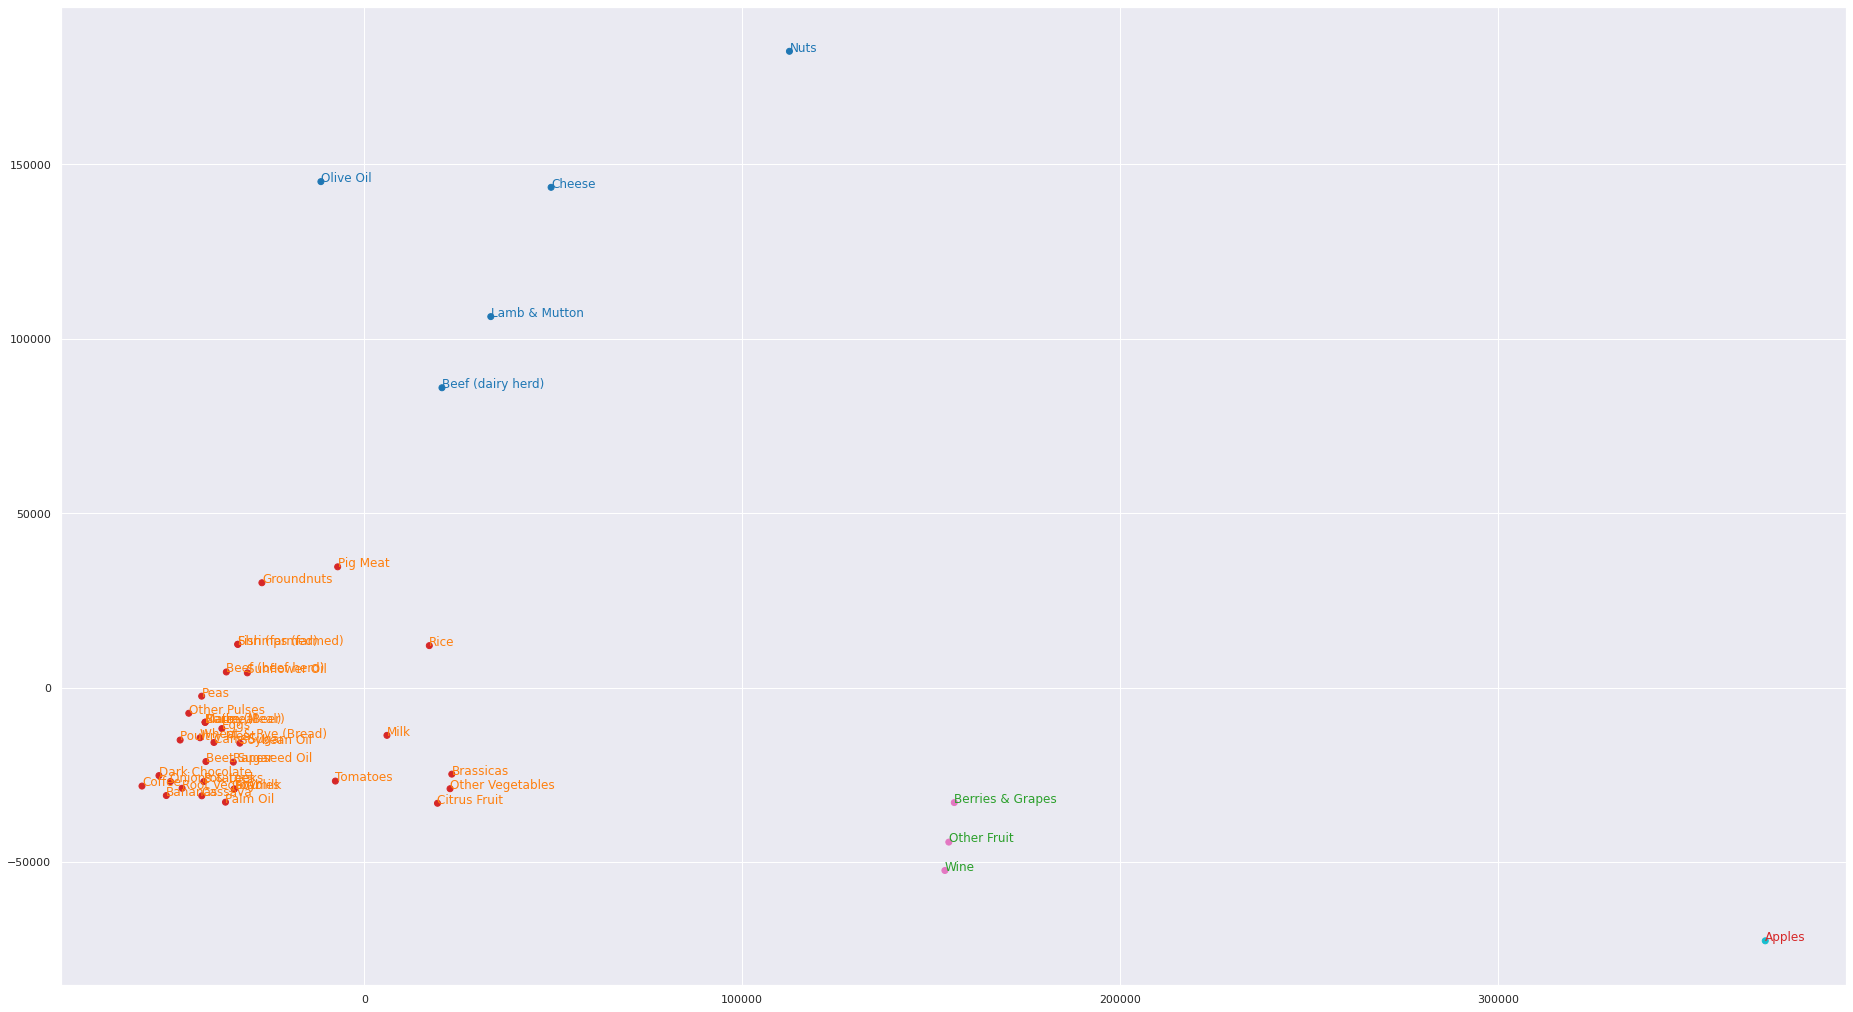

In [ ]:
from sklearn.manifold import TSNE
mapped_embeddings = TSNE(n_components=2, metric='euclidean', init='pca').fit_transform(dataset)

%matplotlib inline
import matplotlib.pyplot as plt
from adjustText import adjust_text

clusters = kmeans.labels_
sentences_list = cluster_map['food_product']

plt.figure(figsize=(32,18))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y, c=clusters, cmap = "tab10" )
#for i, txt in enumerate(sentences_list):
#    plt.annotate(txt[:20], (x[i], y[i]), color=plt.cm.tab10(clusters[i]))
texts = [plt.annotate(txt[:35], (x[i], y[i]),fontsize=12, color=plt.cm.tab10(clusters[i])) for i, txt in enumerate(sentences_list)]
print("Adjusting texts ...")
#adjust_text(texts)

#plt.savefig('//content/gdrive/My Drive/RML-data/sentence_embedding.png')

In [ ]:
df = dataset[['Animal Feed', 'Farm', 'Land use change', 'Processing', 'Transport', 'Packging', 'Retail', 'Total_emissions']].copy(deep=True)

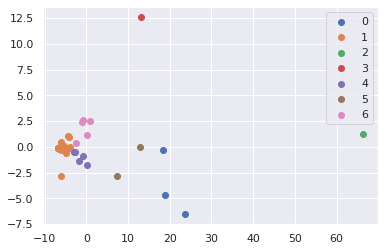

In [ ]:
# kmeans clustering with first 7 columns
kmeans = KMeans(n_clusters=7)
label = kmeans.fit_predict(df)
u_labels = np.unique(label)
labels = kmeans.labels_

pca = PCA(2)
df_new = pca.fit_transform(df)

for i in u_labels:
    plt.scatter(df_new[label == i , 0] , df_new[label == i , 1] , label = i)
plt.legend()
plt.show()

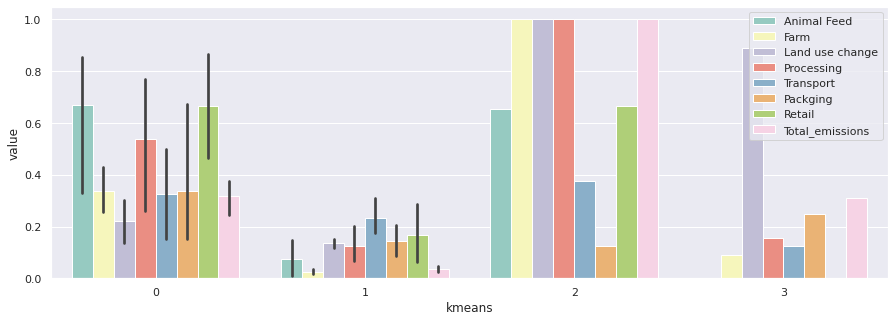

In [ ]:
# barplot using kmeans clustering labels with the first 7 columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns = df.columns
df_scaled['kmeans'] = kmeans.labels_
tidy = df_scaled.melt(id_vars='kmeans')
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='kmeans', y='value', hue='variable', data=tidy, palette='Set3')
plt.legend(loc='upper right')

In [ ]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['food_product'] = le.inverse_transform(dataset['Food product'])
cluster_map['cluster'] = kmeans.labels_
cluster_map.head()

,data_index,food_product,cluster
0,0,Wheat & Rye (Bread),1
1,1,Maize (Meal),1
2,2,Barley (Beer),1
3,3,Oatmeal,1
4,4,Rice,4


Adjusting texts ...


5

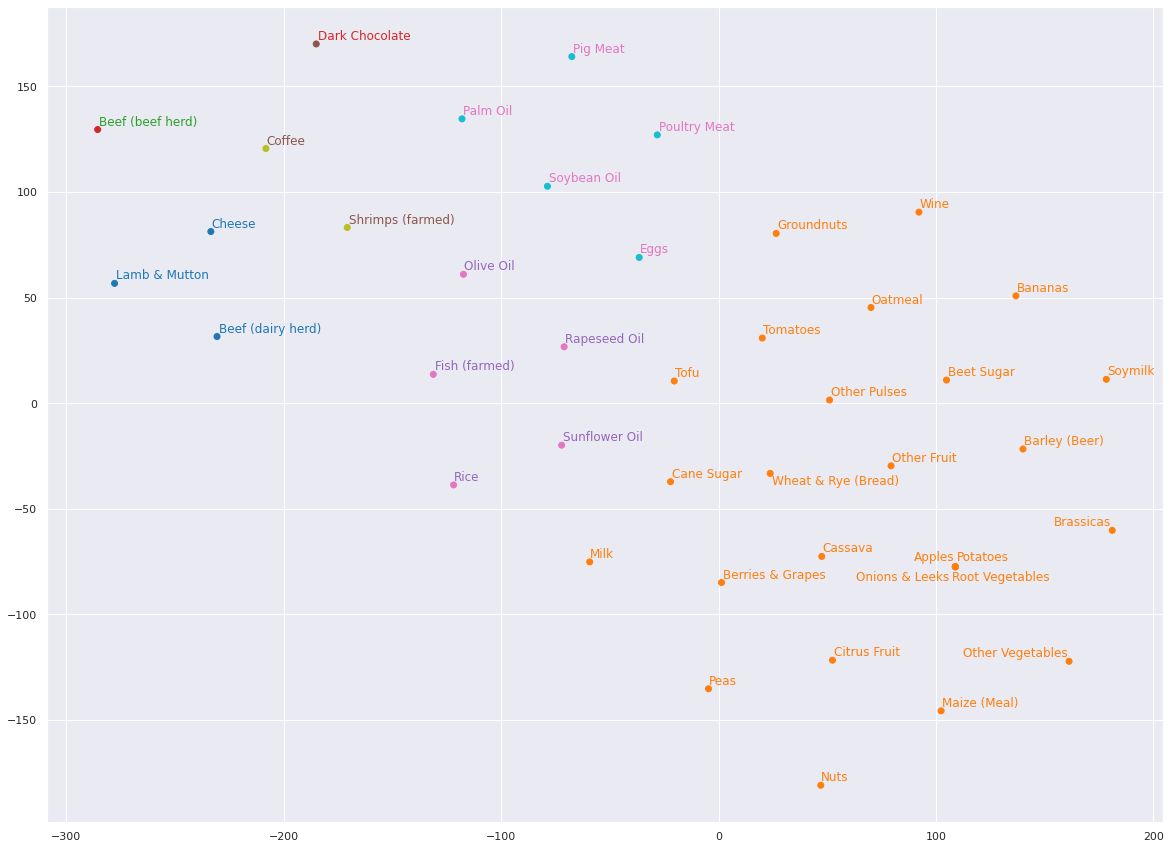

In [ ]:
from sklearn.manifold import TSNE
mapped_embeddings = TSNE(n_components=2, metric='euclidean', init='pca').fit_transform(df)
pca = PCA(2)
#mapped_embeddings =pca.fit_transform(df)

%matplotlib inline
import matplotlib.pyplot as plt
from adjustText import adjust_text

clusters = kmeans.labels_
sentences_list = cluster_map['food_product']

plt.figure(figsize=(20,15))
x = mapped_embeddings[:,0]
y = mapped_embeddings[:,1]
plt.scatter(x, y, c=clusters, cmap = "tab10" )
#for i, txt in enumerate(sentences_list):
#    plt.annotate(txt[:20], (x[i], y[i]), color=plt.cm.tab10(clusters[i]))
texts = [plt.annotate(txt[:35], (x[i], y[i]),fontsize=12, color=plt.cm.tab10(clusters[i])) for i, txt in enumerate(sentences_list)]
print("Adjusting texts ...")
adjust_text(texts)

#plt.savefig('//content/gdrive/My Drive/RML-data/sentence_embedding.png')

# SCENARIOS


In [ ]:
import pandas as pd
scenarios = pd.read_csv('/content/SCENARIO-1-2.csv')
scenarios.drop('Unnamed: 6', axis=1, inplace=True)
scenarios.head()

,Product,Total Production,Percentage Total Production,Healthy Production vizualization,Increase/decrese percent scenario1,Difference vizualization,Increase/decreaase difference scenario1,Healthy production scenario 1,Increase percentage of self production(100) scenario 1,Increase/decrease percent scenario 2,Increase/Decrase difference scenario 2,Healthy production scenario 2,Increase percentage of self production(100) scenario 2
0,Apples,125402515,1.117497,207321244,1.00,81918729,1.122174e+08,2.376199e+08,89.485736,0.0500,5.607286e+06,1.310098e+08,4.471430
1,Bananas,121892122,1.086214,121892122,NaN,0,0.000000e+00,1.218921e+08,0.000000,0.0000,0.000000e+00,1.218921e+08,0.000000
2,Barley (Beer),383189678,3.414709,383189678,NaN,0,0.000000e+00,3.831897e+08,0.000000,0.0000,0.000000e+00,3.831897e+08,0.000000
3,Beef (beef herd),69923186,0.623105,39624512,-0.27,-30298674,-3.029869e+07,3.962450e+07,-43.331390,-0.0135,-1.513967e+06,6.840922e+07,-2.165186
4,Beet Sugar,287379790,2.560921,62945076,-2.00,-224434714,-2.244347e+08,6.294506e+07,-78.096907,-0.1000,-1.121457e+07,2.761652e+08,-3.902352


In [ ]:
scenarios['Increase/decrese percent scenario1'] = scenarios['Increase/decrese percent scenario1'].fillna(0)
kaggle_dataset = pd.read_csv('/content/Food_Production.csv')
kaggle_df = kaggle_dataset[['Food product', 'Animal Feed', 'Farm', 'Land use change', 'Processing', 'Transport', 'Packging', 'Retail', 'Total_emissions']].copy(deep=True)
scenarios.rename(columns={"Product" : "Food product"}, inplace=True)
healthy = kaggle_df.set_index('Food product').join(scenarios.set_index('Food product'))
healthy['Total_emissions_in_tonnes_CO2'] = healthy['Total Production'] * healthy['Total_emissions']
healthy['Product'] = healthy.index
healthy.head()

,Animal Feed,Farm,Land use change,Processing,Transport,Packging,Retail,Total_emissions,Total Production,Percentage Total Production,...,Difference vizualization,Increase/decreaase difference scenario1,Healthy production scenario 1,Increase percentage of self production(100) scenario 1,Increase/decrease percent scenario 2,Increase/Decrase difference scenario 2,Healthy production scenario 2,Increase percentage of self production(100) scenario 2,Total_emissions_in_tonnes_CO2,Product
Food product,,,,,,,,,,,,,,,,,,,,,
Wheat & Rye (Bread),0.0,0.8,0.1,0.2,0.1,0.1,0.1,1.4,8.952597e+08,7.977907,...,81031351.0,8.191868e+07,9.771784e+08,9.150269,0.0365,4093318.583,8.993530e+08,0.457221,1.253364e+09,Wheat & Rye (Bread)
Maize (Meal),0.0,0.5,0.3,0.1,0.1,0.1,0.0,1.1,1.402714e+09,12.499973,...,-159348630.0,-1.593487e+08,1.243365e+09,-11.360025,-0.0710,-7962345.736,1.394752e+09,-0.567639,1.542985e+09,Maize (Meal)
Barley (Beer),0.0,0.2,0.0,0.1,0.0,0.5,0.3,1.1,3.831897e+08,3.414709,...,0.0,0.000000e+00,3.831897e+08,0.000000,0.0000,0.000,3.831897e+08,0.000000,4.215086e+08,Barley (Beer)
Oatmeal,0.0,1.4,0.0,0.0,0.1,0.1,0.0,1.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oatmeal
Rice,0.0,3.6,0.0,0.1,0.1,0.1,0.1,4.0,6.351222e+08,5.659750,...,-56108681.0,-5.610868e+07,5.790135e+08,-8.834312,-0.0250,-2803642.865,6.323186e+08,-0.441434,2.540489e+09,Rice


In [ ]:
healthy.dropna(inplace=True)
healthy['Total_emissions_in_tonnes_CO2_healthy_food_scenario1'] = healthy['Healthy production scenario 1'] * healthy['Total_emissions']
healthy['Total_emissions_in_tonnes_CO2_healthy_food_scenario2'] = healthy['Healthy production scenario 2'] * healthy['Total_emissions']

healthy

,Animal Feed,Farm,Land use change,Processing,Transport,Packging,Retail,Total_emissions,Total Production,Percentage Total Production,...,Healthy production scenario 1,Increase percentage of self production(100) scenario 1,Increase/decrease percent scenario 2,Increase/Decrase difference scenario 2,Healthy production scenario 2,Increase percentage of self production(100) scenario 2,Total_emissions_in_tonnes_CO2,Product,Total_emissions_in_tonnes_CO2_healthy_food_scenario1,Total_emissions_in_tonnes_CO2_healthy_food_scenario2
Food product,,,,,,,,,,,,,,,,,,,,,
Wheat & Rye (Bread),0.0,0.8,0.1,0.2,0.1,0.1,0.1,1.4,8.952597e+08,7.977907,...,9.771784e+08,9.150269,0.0365,4.093319e+06,8.993530e+08,0.457221,1.253364e+09,Wheat & Rye (Bread),1.368050e+09,1.259094e+09
Maize (Meal),0.0,0.5,0.3,0.1,0.1,0.1,0.0,1.1,1.402714e+09,12.499973,...,1.243365e+09,-11.360025,-0.0710,-7.962346e+06,1.394752e+09,-0.567639,1.542985e+09,Maize (Meal),1.367702e+09,1.534227e+09
Barley (Beer),0.0,0.2,0.0,0.1,0.0,0.5,0.3,1.1,3.831897e+08,3.414709,...,3.831897e+08,0.000000,0.0000,0.000000e+00,3.831897e+08,0.000000,4.215086e+08,Barley (Beer),4.215086e+08,4.215086e+08
Rice,0.0,3.6,0.0,0.1,0.1,0.1,0.1,4.0,6.351222e+08,5.659750,...,5.790135e+08,-8.834312,-0.0250,-2.803643e+06,6.323186e+08,-0.441434,2.540489e+09,Rice,2.316054e+09,2.529274e+09
Potatoes,0.0,0.2,0.0,0.0,0.1,0.0,0.0,0.3,5.814232e+08,5.181223,...,1.638511e+09,181.810346,0.4710,5.282063e+07,6.342439e+08,9.084713,1.744270e+08,Potatoes,4.915532e+08,1.902732e+08
Cassava,0.0,0.2,0.6,0.0,0.1,0.0,0.0,0.9,2.954752e+08,2.633061,...,2.954752e+08,0.000000,0.0000,0.000000e+00,2.954752e+08,0.000000,2.659277e+08,Cassava,2.659277e+08,2.659277e+08
Cane Sugar,0.0,0.5,1.2,0.0,0.8,0.1,0.0,2.6,1.984872e+09,17.687744,...,2.657020e+08,-86.613646,-0.7660,-8.590362e+07,1.898968e+09,-4.327917,5.160667e+09,Cane Sugar,6.908252e+08,4.937318e+09
Beet Sugar,0.0,0.5,0.0,0.2,0.6,0.1,0.0,1.4,2.873798e+08,2.560921,...,6.294506e+07,-78.096907,-0.1000,-1.121457e+07,2.761652e+08,-3.902352,4.023317e+08,Beet Sugar,8.812309e+07,3.866313e+08
Peas,0.0,0.7,0.0,0.0,0.1,0.0,0.0,0.8,4.850081e+07,0.432204,...,4.850081e+07,0.000000,0.0000,0.000000e+00,4.850081e+07,0.000000,3.880065e+07,Peas,3.880065e+07,3.880065e+07


In [ ]:
healthy1 = healthy.sort_values(['Healthy production scenario 1'], ascending=True)

SCENARIO 1
--

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls
import plotly.io as pio
pio.renderers.default = 'colab'
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
trace = go.Scatter(
    x = healthy1.Product,
    y = healthy1['Total Production'],
    mode = "lines+markers",
    name="food production",
    marker = dict(color = 'rgba(80, 26, 80, 0.8)')
)

trace2 = go.Scatter(
    x = healthy1.Product,
    y = healthy1['Healthy production scenario 1'],
    mode = "lines+markers",
    name="food production healthy ideal scenario",
    marker = dict(color = 'rgba(255, 6, 10, 0.8)')
)

data = [trace, trace2]

layout = dict(title="food production", xaxis= dict(title= 'Food Production',ticklen= 5,zeroline= False))

fig = go.Figure(data=data, layout=layout)
#py.iplot(fig)
fig.show(renderer="colab")

Text(0, 0.5, 'Total production in tonnes')

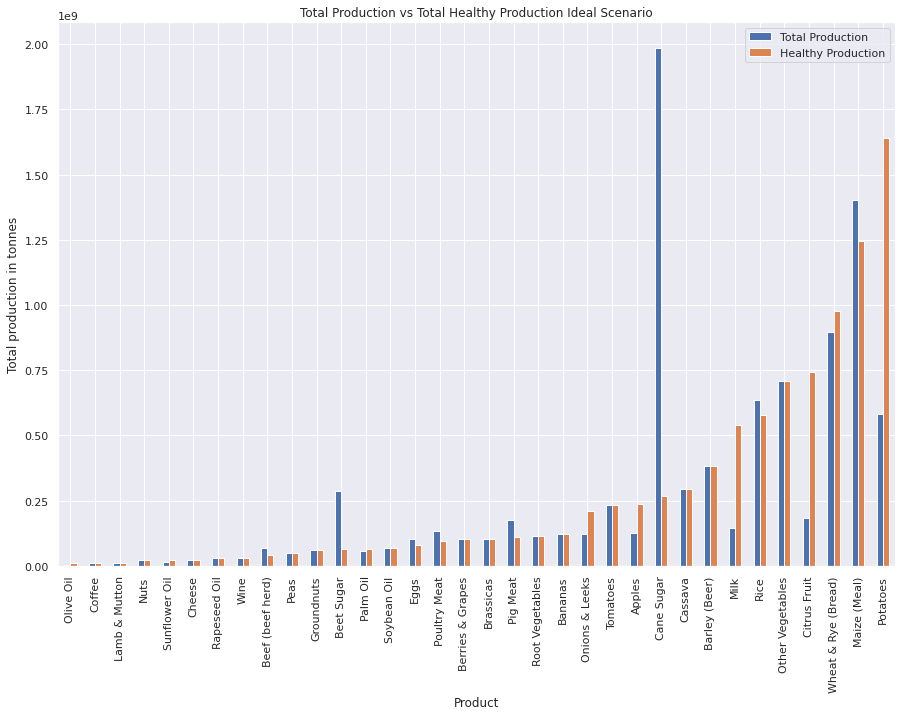

In [ ]:
healthy_prod = pd.DataFrame({
    'Total Production': healthy1['Total Production'],
    'Healthy Production': healthy1['Healthy production scenario 1']
    },
  index = healthy1['Product']
)


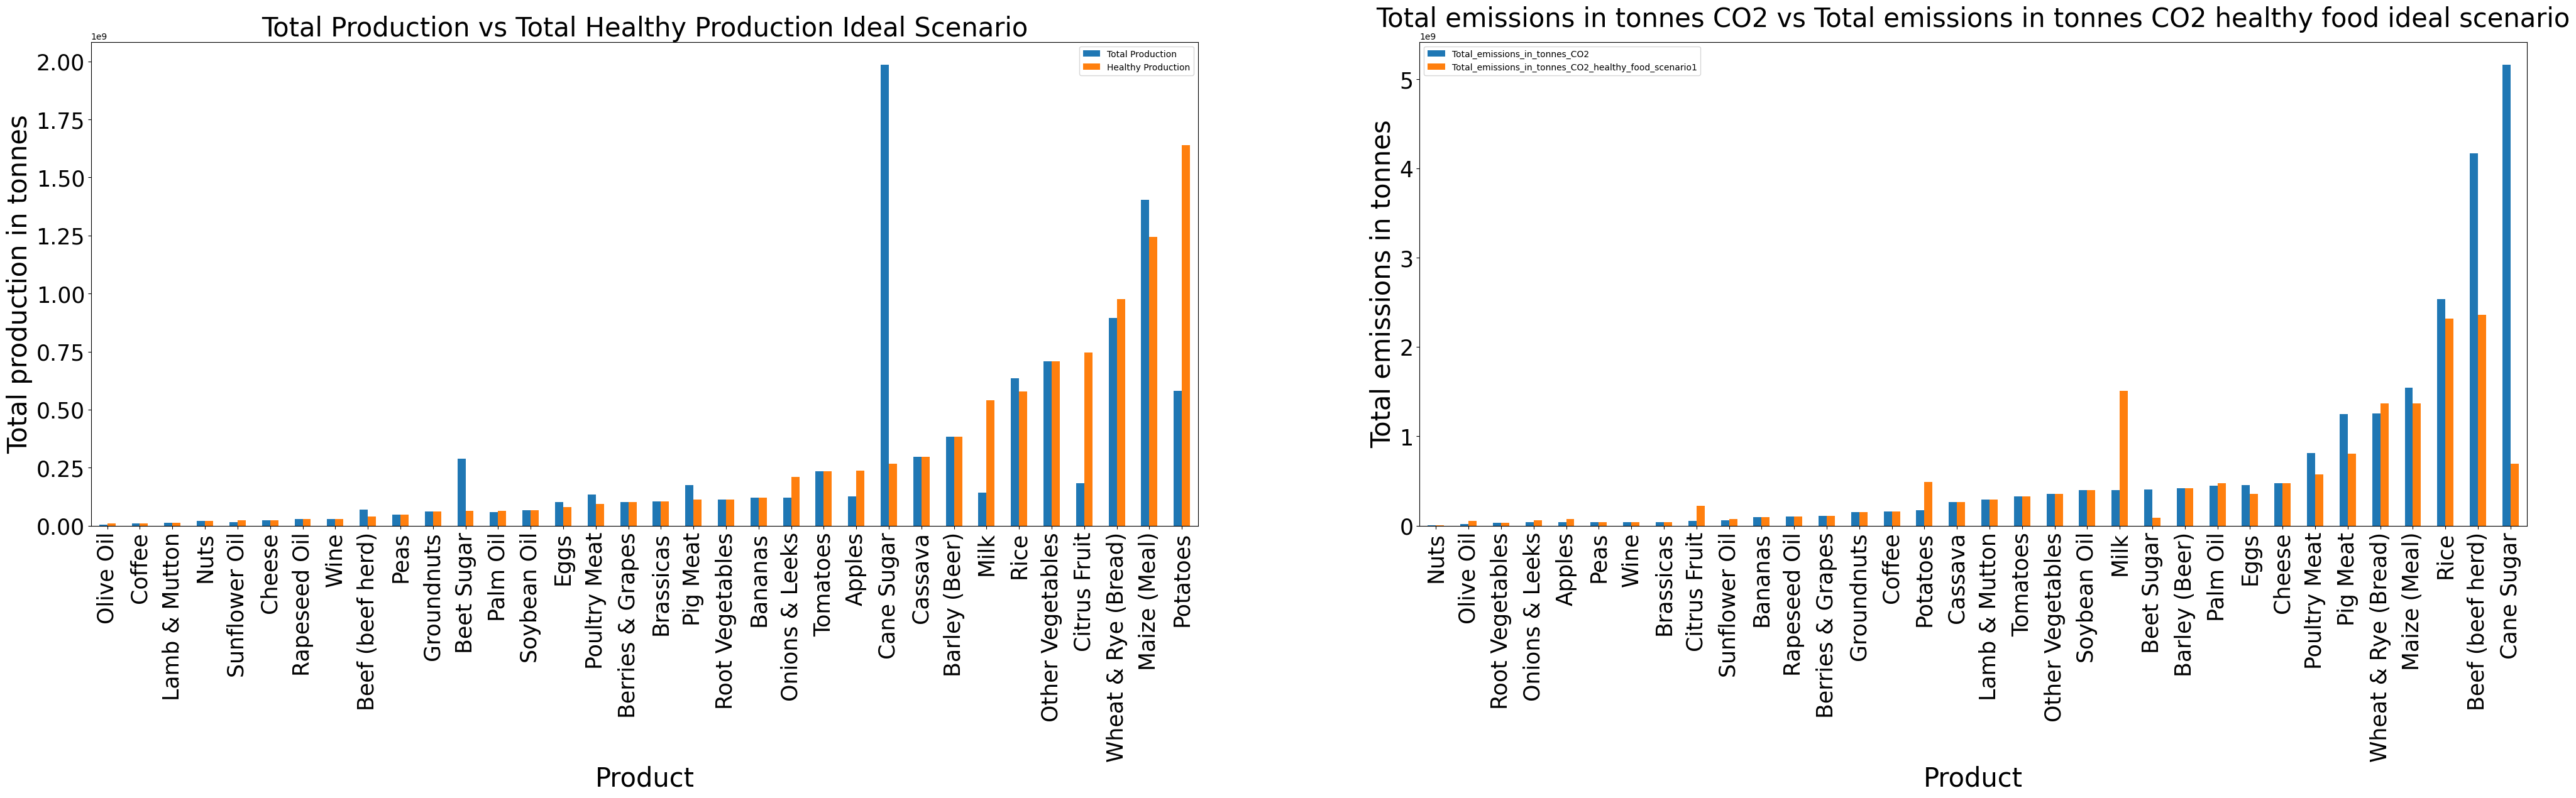

In [ ]:
fig, ax = plt.subplots(figsize=(100,100),nrows=1, ncols=2)
healthy1 = healthy.sort_values(['Healthy production scenario 1'], ascending=True)
healthy_prod = pd.DataFrame({
    'Total Production': healthy1['Total Production'],
    'Healthy Production': healthy1['Healthy production scenario 1']
    },
  index = healthy1['Product']
)

ax1=healthy_prod.plot(kind="bar",figsize=[50,10], ax= ax[0],fontsize=25)
ax1.set_title('Total Production vs Total Healthy Production Ideal Scenario',fontsize=30)
ax1.set_xlabel('Product',fontsize=30)
ax1.set_ylabel('Total production in tonnes',fontsize=30)
healthy1 = healthy.sort_values(['Total_emissions_in_tonnes_CO2'], ascending=True)
healthy_prod = pd.DataFrame({
    'Total_emissions_in_tonnes_CO2': healthy1['Total_emissions_in_tonnes_CO2'],
    'Total_emissions_in_tonnes_CO2_healthy_food_scenario1': healthy1['Total_emissions_in_tonnes_CO2_healthy_food_scenario1']
    },
  index = healthy1['Product']
)

ax2=healthy_prod.plot(kind="bar", figsize=[50,10],ax= ax[1],fontsize=25)
ax2.set_title('Total emissions in tonnes CO2 vs Total emissions in tonnes CO2 healthy food ideal scenario',fontsize=30)
ax2.set_xlabel('Product',fontsize=30)
ax2.set_ylabel('Total emissions in tonnes',fontsize=30)
plt.show()

Text(0, 0.5, 'Total emissions in tonnes')

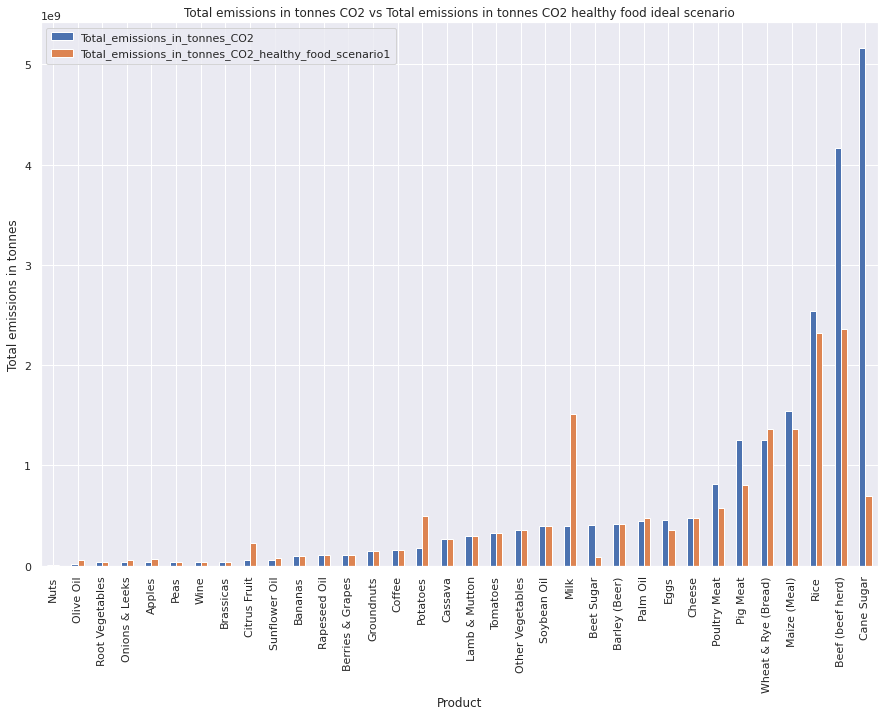

In [ ]:
healthy1 = healthy.sort_values(['Total_emissions_in_tonnes_CO2'], ascending=True)
healthy_prod = pd.DataFrame({
    'Total_emissions_in_tonnes_CO2': healthy1['Total_emissions_in_tonnes_CO2'],
    'Total_emissions_in_tonnes_CO2_healthy_food_scenario1': healthy1['Total_emissions_in_tonnes_CO2_healthy_food_scenario1']
    },
  index = healthy1['Product']
)

healthy_prod.plot(kind="bar", figsize=[15,10])
plt.title('Total emissions in tonnes CO2 vs Total emissions in tonnes CO2 healthy food ideal scenario')
plt.xlabel('Product')
plt.ylabel('Total emissions in tonnes')

Text(0.5, 0, 'Product')

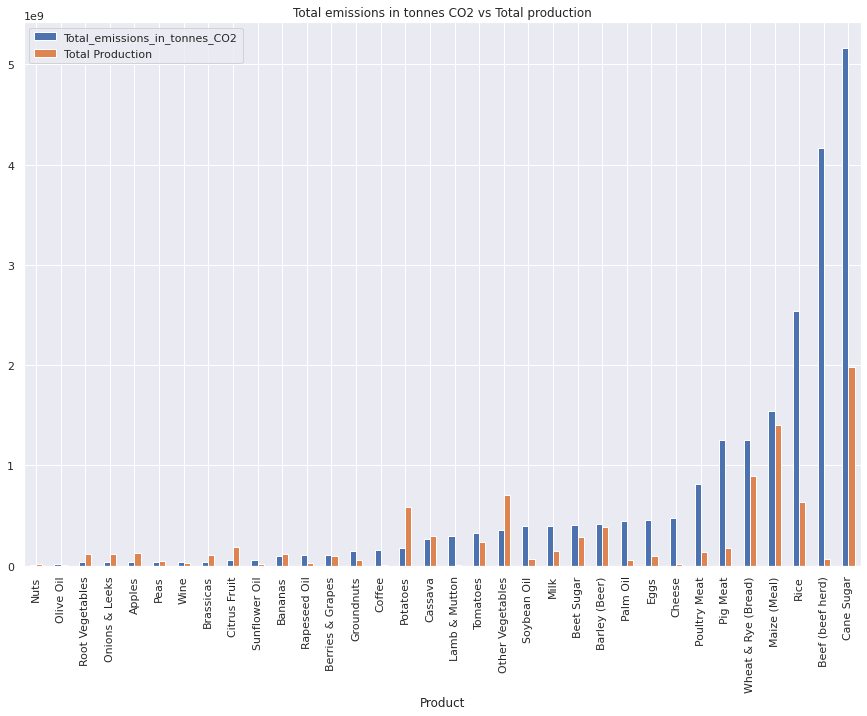

In [ ]:
healthy1 = healthy.sort_values(['Total_emissions_in_tonnes_CO2'], ascending=True)
healthy_prod = pd.DataFrame({
    'Total_emissions_in_tonnes_CO2': healthy1['Total_emissions_in_tonnes_CO2'],
    'Total Production': healthy1['Total Production']
    },
  index = healthy1['Product']
)

healthy_prod.plot(kind="bar", figsize=[15,10])
plt.title('Total emissions in tonnes CO2 vs Total production')
plt.xlabel('Product')

Text(0.5, 0, 'Product')

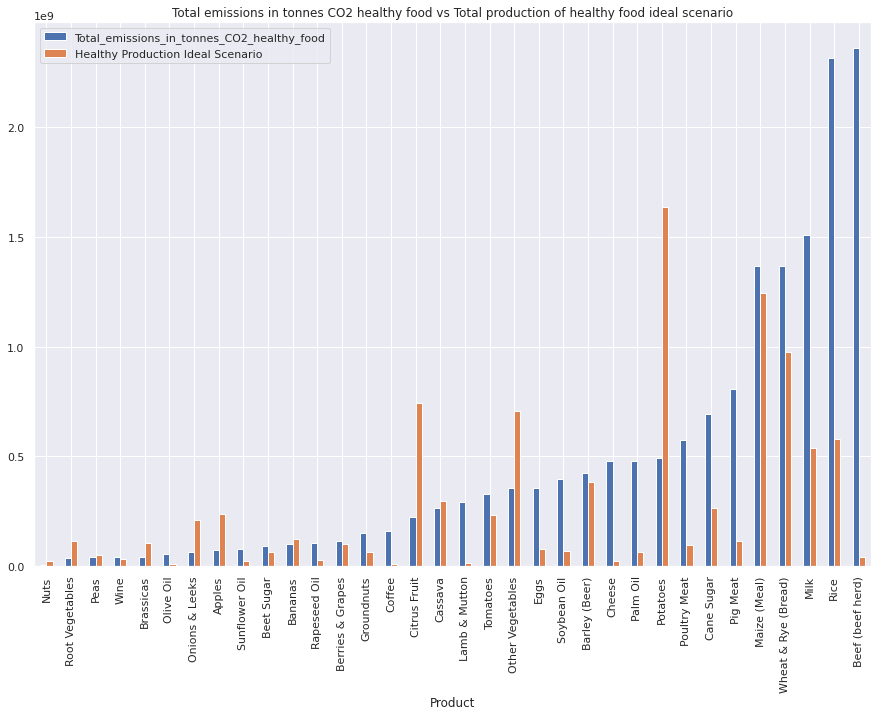

In [ ]:
healthy1 = healthy.sort_values(['Total_emissions_in_tonnes_CO2_healthy_food_scenario1'], ascending=True)
healthy_prod = pd.DataFrame({
    'Total_emissions_in_tonnes_CO2_healthy_food': healthy1['Total_emissions_in_tonnes_CO2_healthy_food_scenario1'],
    'Healthy Production Ideal Scenario': healthy1['Healthy production scenario 1']
    },
  index = healthy1['Product']
)

healthy_prod.plot(kind="bar", figsize=[15,10])
plt.title('Total emissions in tonnes CO2 healthy food vs Total production of healthy food ideal scenario')
plt.xlabel('Product')

SCENARIO 2
--

In [ ]:
healthy1 = healthy.sort_values(['Healthy production scenario 2'], ascending=True)

trace = go.Scatter(
    x = healthy1.Product,
    y = healthy1['Total Production'],
    mode = "lines+markers",
    name="food production",
    marker = dict(color = 'rgba(80, 26, 80, 0.8)')
)

trace2 = go.Scatter(
    x = healthy1.Product,
    y = healthy1['Healthy production scenario 2'],
    mode = "lines+markers",
    name="food production healthy scenario 2",
    marker = dict(color = 'rgba(255, 6, 10, 0.8)')
)

data = [trace, trace2]

layout = dict(title="food production", xaxis= dict(title= 'Food Production',ticklen= 5,zeroline= False))

fig = go.Figure(data=data, layout=layout)
#py.iplot(fig)
fig.show(renderer="colab")

Text(0, 0.5, 'Total production in tonnes')

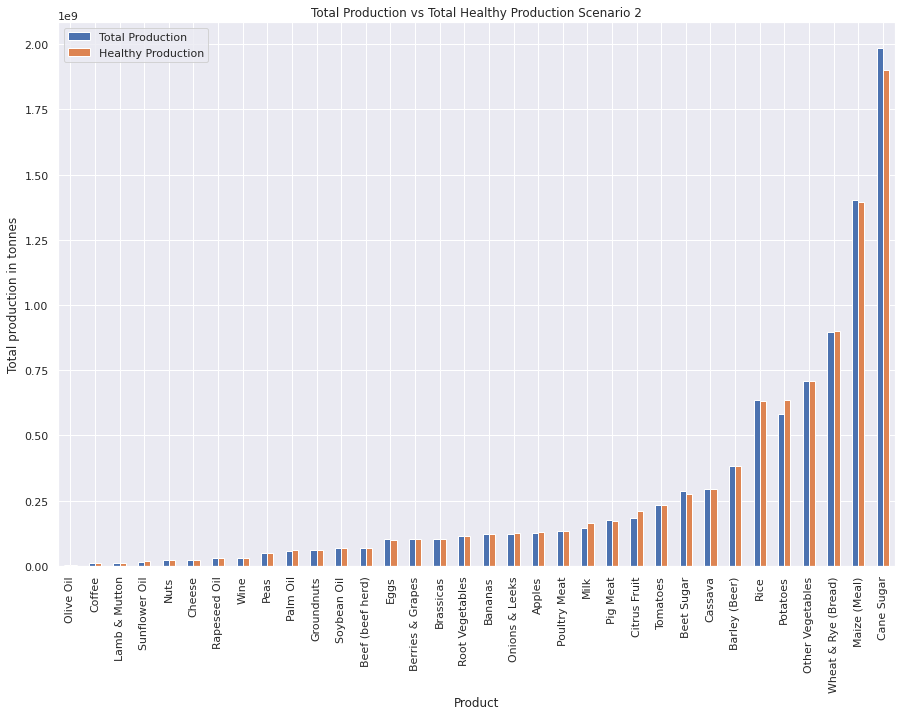

In [ ]:
healthy_prod = pd.DataFrame({
    'Total Production': healthy1['Total Production'],
    'Healthy Production': healthy1['Healthy production scenario 2']
    },
  index = healthy1['Product']
)

healthy_prod.plot(kind="bar", figsize=[15,10])
plt.title('Total Production vs Total Healthy Production Scenario 2')
plt.xlabel('Product')
plt.ylabel('Total production in tonnes')


Text(0, 0.5, 'Total emissions in tonnes')

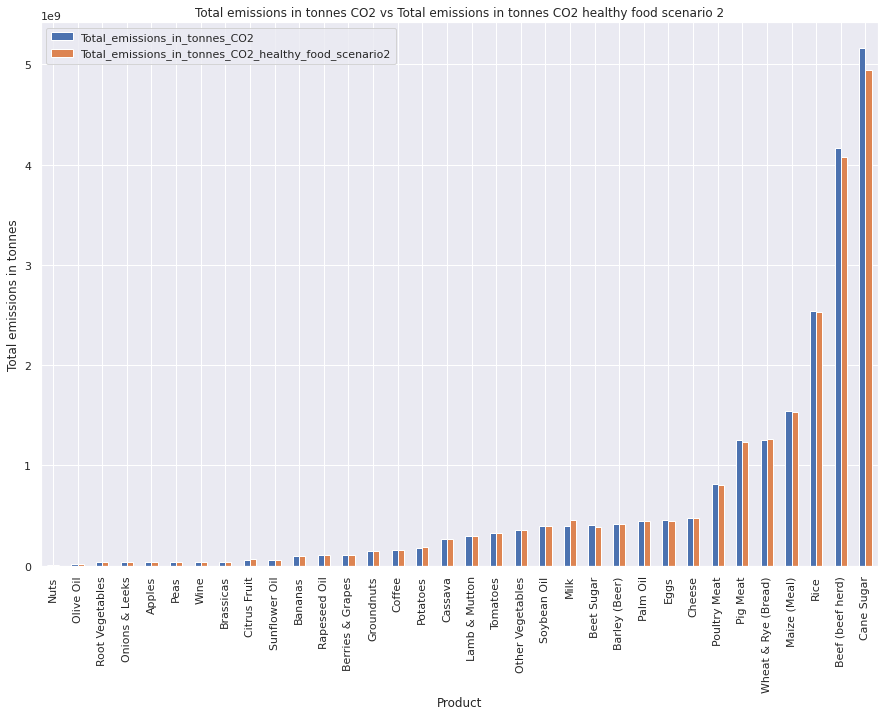

In [ ]:
healthy1 = healthy.sort_values(['Total_emissions_in_tonnes_CO2'], ascending=True)
healthy_prod = pd.DataFrame({
    'Total_emissions_in_tonnes_CO2': healthy1['Total_emissions_in_tonnes_CO2'],
    'Total_emissions_in_tonnes_CO2_healthy_food_scenario2': healthy1['Total_emissions_in_tonnes_CO2_healthy_food_scenario2']
    },
  index = healthy1['Product']
)

healthy_prod.plot(kind="bar", figsize=[15,10])
plt.title('Total emissions in tonnes CO2 vs Total emissions in tonnes CO2 healthy food scenario 2')
plt.xlabel('Product')
plt.ylabel('Total emissions in tonnes')

Text(0.5, 0, 'Product')

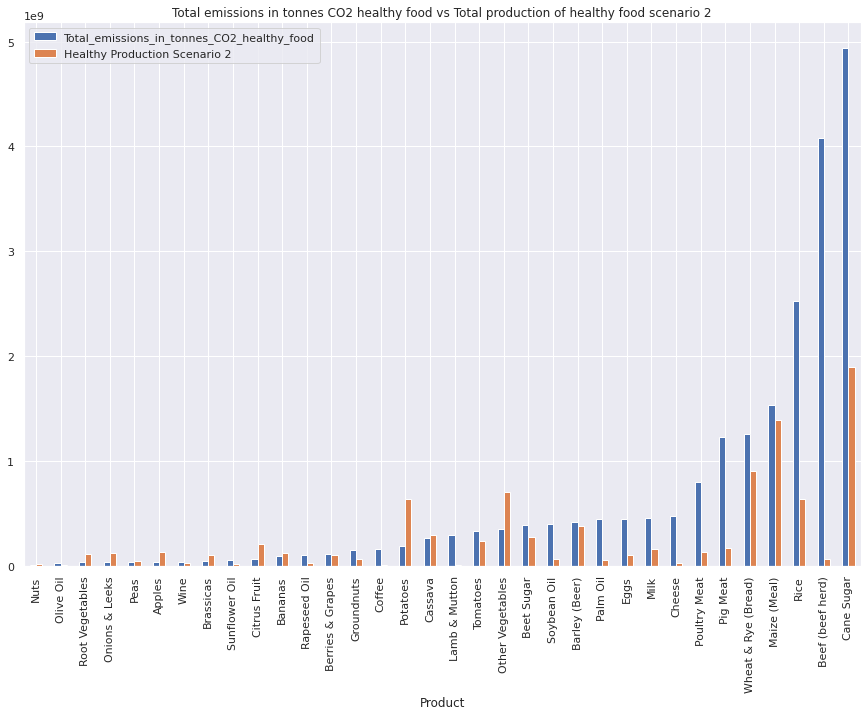

In [ ]:
healthy1 = healthy.sort_values(['Total_emissions_in_tonnes_CO2_healthy_food_scenario2'], ascending=True)
healthy_prod = pd.DataFrame({
    'Total_emissions_in_tonnes_CO2_healthy_food': healthy1['Total_emissions_in_tonnes_CO2_healthy_food_scenario2'],
    'Healthy Production Scenario 2': healthy1['Healthy production scenario 2']
    },
  index = healthy1['Product']
)

healthy_prod.plot(kind="bar", figsize=[15,10])
plt.title('Total emissions in tonnes CO2 healthy food vs Total production of healthy food scenario 2')
plt.xlabel('Product')

Total emissions vs total emissions ideal scenario


In [ ]:
total_emission = healthy['Total_emissions_in_tonnes_CO2'].sum()
total_emission_healthy = healthy['Total_emissions_in_tonnes_CO2_healthy_food_scenario1'].sum()
total_emission_healthy < total_emission

True

In [ ]:
total_emission_healthy * 100 / total_emission

73.26556464923019

Total emissions vs total emissions scenario 2

In [ ]:
total_emission = healthy['Total_emissions_in_tonnes_CO2'].sum()
total_emission_healthy = healthy['Total_emissions_in_tonnes_CO2_healthy_food_scenario2'].sum()
total_emission_healthy < total_emission

True

In [ ]:
total_emission_healthy * 100 / total_emission

98.66413171317463

Total emissions vs total emissions scenario 3

In [ ]:
total_emission = healthy['Total_emissions_in_tonnes_CO2'].sum()
total_emission_healthy = healthy['Total_emissions_in_tonnes_CO2_healthy_food_scenario3'].sum()
total_emission_healthy < total_emission

True

In [ ]:
total_emission_healthy * 100 / total_emission

95.98983470064371

SCENARIO 3
--

In [ ]:
scenarios = pd.read_csv('/content/drive/MyDrive/scenarios.csv')
scenarios.drop('Unnamed: 6', axis=1, inplace=True)
scenarios.head()

,Product,Total Production,Percentage Total Production,Healthy Production vizualization,Increase/decrese percent scenario1,Difference vizualization,Increase/decreaase difference scenario1,Healthy production scenario 1,Increase percentage of self production(100) scenario 1,Increase/decrease percent scenario 2,Increase/Decrase difference scenario 2,Healthy production scenario 2,Increase percentage of self production(100) scenario 2,Increase/decrease percent scenario 3,Increase / Decrease diffrence scenario 3,Healthy production scenario 3,Increase percentage of self production scenario(100) 3,Increase/decrease percent scenario 4,Increase / Decrease diffrence scenario 4,Healthy production scenario 4,Increase percentage of self production scenario(100) 4,Increase/decrease percent scenario 5,Increase / Decrease diffrence scenario 5,Healthy production scenario 5,Increase percentage of self production scenario(100) 5
0,Apples,125402515,1.117497,207321244,1.00,81918729,1.122174e+08,2.376199e+08,89.485736,0.0500,5.607286e+06,1.310098e+08,4.471430,0.1500,16832604.59,1.422351e+08,13.422860,0.2500,2.805434e+07,1.534569e+08,22.371434,0.500,5.610868e+07,1.815112e+08,44.742868
1,Bananas,121892122,1.086214,121892122,NaN,0,0.000000e+00,1.218921e+08,0.000000,0.0000,0.000000e+00,1.218921e+08,0.000000,0.0000,0.00,1.218921e+08,0.000000,0.0000,0.000000e+00,1.218921e+08,0.000000,0.000,0.000000e+00,1.218921e+08,0.000000
2,Barley (Beer),383189678,3.414709,383189678,NaN,0,0.000000e+00,3.831897e+08,0.000000,0.0000,0.000000e+00,3.831897e+08,0.000000,0.0000,0.00,3.831897e+08,0.000000,0.0000,0.000000e+00,3.831897e+08,0.000000,0.000,0.000000e+00,3.831897e+08,0.000000
3,Beef (beef herd),69923186,0.623105,39624512,-0.27,-30298674,-3.029869e+07,3.962450e+07,-43.331390,-0.0135,-1.513967e+06,6.840922e+07,-2.165186,-0.0405,-4544803.24,6.537838e+07,-6.499708,-0.0675,-7.574672e+06,6.234851e+07,-10.832847,-0.135,-1.514934e+07,5.477384e+07,-21.665695
4,Beet Sugar,287379790,2.560921,62945076,-2.00,-224434714,-2.244347e+08,6.294506e+07,-78.096907,-0.1000,-1.121457e+07,2.761652e+08,-3.902352,-0.3000,-33665209.18,2.537146e+08,-11.714536,-0.5000,-5.610868e+07,2.312711e+08,-19.524227,-1.000,-1.122174e+08,1.751624e+08,-39.048454


In [ ]:
scenarios['Increase/decrese percent scenario1'] = scenarios['Increase/decrese percent scenario1'].fillna(0)
kaggle_dataset = pd.read_csv('/content/drive/MyDrive/Food_Production.csv')
kaggle_df = kaggle_dataset[['Food product', 'Animal Feed', 'Farm', 'Land use change', 'Processing', 'Transport', 'Packging', 'Retail', 'Total_emissions']].copy(deep=True)
scenarios.rename(columns={"Product" : "Food product"}, inplace=True)
healthy = kaggle_df.set_index('Food product').join(scenarios.set_index('Food product'))
healthy['Total_emissions_in_tonnes_CO2'] = healthy['Total Production'] * healthy['Total_emissions']
healthy['Product'] = healthy.index
healthy.head()

,Animal Feed,Farm,Land use change,Processing,Transport,Packging,Retail,Total_emissions,Total Production,Percentage Total Production,Healthy Production vizualization,Increase/decrese percent scenario1,Difference vizualization,Increase/decreaase difference scenario1,Healthy production scenario 1,Increase percentage of self production(100) scenario 1,Increase/decrease percent scenario 2,Increase/Decrase difference scenario 2,Healthy production scenario 2,Increase percentage of self production(100) scenario 2,Increase/decrease percent scenario 3,Increase / Decrease diffrence scenario 3,Healthy production scenario 3,Increase percentage of self production scenario(100) 3,Increase/decrease percent scenario 4,Increase / Decrease diffrence scenario 4,Healthy production scenario 4,Increase percentage of self production scenario(100) 4,Increase/decrease percent scenario 5,Increase / Decrease diffrence scenario 5,Healthy production scenario 5,Increase percentage of self production scenario(100) 5,Total_emissions_in_tonnes_CO2,Product
Food product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Wheat & Rye (Bread),0.0,0.8,0.1,0.2,0.1,0.1,0.1,1.4,8.952597e+08,7.977907,9.762911e+08,0.73,81031351.0,8.191868e+07,9.771784e+08,9.150269,0.0365,4093318.583,8.993530e+08,0.457221,0.1095,1.228780e+07,9.075475e+08,1.372540,0.1825,20479668.92,9.157394e+08,2.287567,0.365,40959337.84,9.362191e+08,4.575135,1.253364e+09,Wheat & Rye (Bread)
Maize (Meal),0.0,0.5,0.3,0.1,0.1,0.1,0.0,1.1,1.402714e+09,12.499973,1.243365e+09,-1.42,-159348630.0,-1.593487e+08,1.243365e+09,-11.360025,-0.0710,-7962345.736,1.394752e+09,-0.567639,-0.2130,-2.390230e+07,1.378812e+09,-1.704004,-0.3550,-39837164.20,1.362877e+09,-2.840006,-0.710,-79674328.40,1.323040e+09,-5.680012,1.542985e+09,Maize (Meal)
Barley (Beer),0.0,0.2,0.0,0.1,0.0,0.5,0.3,1.1,3.831897e+08,3.414709,3.831897e+08,0.00,0.0,0.000000e+00,3.831897e+08,0.000000,0.0000,0.000,3.831897e+08,0.000000,0.0000,0.000000e+00,3.831897e+08,0.000000,0.0000,0.00,3.831897e+08,0.000000,0.000,0.00,3.831897e+08,0.000000,4.215086e+08,Barley (Beer)
Oatmeal,0.0,1.4,0.0,0.0,0.1,0.1,0.0,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oatmeal
Rice,0.0,3.6,0.0,0.1,0.1,0.1,0.1,4.0,6.351222e+08,5.659750,5.790135e+08,-0.50,-56108681.0,-5.610868e+07,5.790135e+08,-8.834312,-0.0250,-2803642.865,6.323186e+08,-0.441434,-0.0750,-8.416302e+06,6.267059e+08,-1.325147,-0.1250,-14027170.49,6.210951e+08,-2.208578,-0.250,-28054340.99,6.070679e+08,-4.417156,2.540489e+09,Rice


In [ ]:
healthy.dropna(inplace=True)
healthy['Total_emissions_in_tonnes_CO2_healthy_food_scenario1'] = healthy['Healthy production scenario 1'] * healthy['Total_emissions']
healthy['Total_emissions_in_tonnes_CO2_healthy_food_scenario2'] = healthy['Healthy production scenario 2'] * healthy['Total_emissions']
healthy['Total_emissions_in_tonnes_CO2_healthy_food_scenario3'] = healthy['Healthy production scenario 3'] * healthy['Total_emissions']

healthy

,Animal Feed,Farm,Land use change,Processing,Transport,Packging,Retail,Total_emissions,Total Production,Percentage Total Production,Healthy Production vizualization,Increase/decrese percent scenario1,Difference vizualization,Increase/decreaase difference scenario1,Healthy production scenario 1,Increase percentage of self production(100) scenario 1,Increase/decrease percent scenario 2,Increase/Decrase difference scenario 2,Healthy production scenario 2,Increase percentage of self production(100) scenario 2,Increase/decrease percent scenario 3,Increase / Decrease diffrence scenario 3,Healthy production scenario 3,Increase percentage of self production scenario(100) 3,Increase/decrease percent scenario 4,Increase / Decrease diffrence scenario 4,Healthy production scenario 4,Increase percentage of self production scenario(100) 4,Increase/decrease percent scenario 5,Increase / Decrease diffrence scenario 5,Healthy production scenario 5,Increase percentage of self production scenario(100) 5,Total_emissions_in_tonnes_CO2,Product,Total_emissions_in_tonnes_CO2_healthy_food_scenario1,Total_emissions_in_tonnes_CO2_healthy_food_scenario2,Total_emissions_in_tonnes_CO2_healthy_food_scenario3
Food product,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Wheat & Rye (Bread),0.0,0.8,0.1,0.2,0.1,0.1,0.1,1.4,8.952597e+08,7.977907,9.762911e+08,0.73,8.103135e+07,8.191868e+07,9.771784e+08,9.150269,0.0365,4.093319e+06,8.993530e+08,0.457221,0.1095,1.228780e+07,9.075475e+08,1.372540,0.1825,2.047967e+07,9.157394e+08,2.287567,0.365,4.095934e+07,9.362191e+08,4.575135,1.253364e+09,Wheat & Rye (Bread),1.368050e+09,1.259094e+09,1.270567e+09
Maize (Meal),0.0,0.5,0.3,0.1,0.1,0.1,0.0,1.1,1.402714e+09,12.499973,1.243365e+09,-1.42,-1.593486e+08,-1.593487e+08,1.243365e+09,-11.360025,-0.0710,-7.962346e+06,1.394752e+09,-0.567639,-0.2130,-2.390230e+07,1.378812e+09,-1.704004,-0.3550,-3.983716e+07,1.362877e+09,-2.840006,-0.710,-7.967433e+07,1.323040e+09,-5.680012,1.542985e+09,Maize (Meal),1.367702e+09,1.534227e+09,1.516693e+09
Barley (Beer),0.0,0.2,0.0,0.1,0.0,0.5,0.3,1.1,3.831897e+08,3.414709,3.831897e+08,0.00,0.000000e+00,0.000000e+00,3.831897e+08,0.000000,0.0000,0.000000e+00,3.831897e+08,0.000000,0.0000,0.000000e+00,3.831897e+08,0.000000,0.0000,0.000000e+00,3.831897e+08,0.000000,0.000,0.000000e+00,3.831897e+08,0.000000,4.215086e+08,Barley (Beer),4.215086e+08,4.215086e+08,4.215086e+08
Rice,0.0,3.6,0.0,0.1,0.1,0.1,0.1,4.0,6.351222e+08,5.659750,5.790135e+08,-0.50,-5.610868e+07,-5.610868e+07,5.790135e+08,-8.834312,-0.0250,-2.803643e+06,6.323186e+08,-0.441434,-0.0750,-8.416302e+06,6.267059e+08,-1.325147,-0.1250,-1.402717e+07,6.210951e+08,-2.208578,-0.250,-2.805434e+07,6.070679e+08,-4.417156,2.540489e+09,Rice,2.316054e+09,2.529274e+09,2.506824e+09
Potatoes,0.0,0.2,0.0,0.0,0.1,0.0,0.0,0.3,5.814232e+08,5.181223,1.638374e+09,9.42,1.056950e+09,1.057088e+09,1.638511e+09,181.810346,0.4710,5.282063e+07,6.342439e+08,9.084713,1.4130,1.585631e+08,7.399864e+08,27.271552,2.3550,2.642719e+08,8.456951e+08,45.452586,4.710,5.285438e+08,1.109967e+09,90.905173,1.744270e+08,Potatoes,4.915532e+08,1.902732e+08,2.219959e+08
Cassava,0.0,0.2,0.6,0.0,0.1,0.0,0.0,0.9,2.954752e+08,2.633061,2.954752e+08,0.00,0.000000e+00,0.000000e+00,2.954752e+08,0.000000,0.0000,0.000000e+00,2.954752e+08,0.000000,0.0000,0.000000e+00,2.954752e+08,0.000000,0.0000,0.000000e+00,2.954752e+08,0.000000,0.000,0.000000e+00,2.954752e+08,0.000000,2.659277e+08,Cassava,2.659277e+08,2.659277e+08,2.659277e+08
Cane Sugar,0.0,0.5,1.2,0.0,0.8,0.1,0.0,2.6,1.984872e+09,17.687744,2.657020e+08,-15.32,-1.719170e+09,-1.719170e+09,2.657020e+08,-86.613646,-0.7660,-8.590362e+07,1.898968e+09,-4.327917,-2.2980,-2.578755e+08,1.726997e+09,-12.992047,-3.8300,-4.297925e+08,1.555080e+09,-21.653411,-7.660,-8.595850e+08,1.125287e+09,-43.306823,5.160667e+09,Cane Sugar,6.908252e+08,4.937318e+09,4.490191e+09
Beet Sugar,0.0,0.5,0.0,0.2,0.6,0.1,0.0,1.4,2.873798e+08,2.560921,6.294508e+07,-2.00,-2.244347e+08,-2.244347e+08,6.294506e+07,-78.096907,-0.1000,-1.121457e+07,2

SCENARIO WITH DIRECTIONS - 5% and 10%
--

SCENARIO 5%

In [ ]:
scenarios_dir = pd.read_csv('/content/drive/MyDrive/scenario_so_nasoki.csv')
scenarios_dir.head()

,Product,Total Production,Percentage Total Production,Increase/decrese percent ideal scenario,Increase/decreaase difference ideal scenario,Healthy production ideal scenario,Increase percentage of self production(100) ideal scenario,Increase/decrease direction,Increase/decrease difference 5% scenario,Healthy production 5% direction scenario,Increase/decrease difference 10% scenario,Healthy production 10% direction
0,Apples,125402515,1.117497,1.00,1.122174e+08,2.376199e+08,89.485736,1,6270125.75,131672640.8,12540251.5,137942766.5
1,Bananas,121892122,1.086214,0.00,0.000000e+00,1.218921e+08,0.000000,0,0.00,121892122.0,0.0,121892122.0
2,Barley (Beer),383189678,3.414709,0.00,0.000000e+00,3.831897e+08,0.000000,0,0.00,383189678.0,0.0,383189678.0
3,Beef (beef herd),69923186,0.623105,-0.27,-3.029869e+07,3.962450e+07,-43.331390,-1,-3496159.30,66427026.7,-6992318.6,62930867.4
4,Beet Sugar,287379790,2.560921,-2.00,-2.244347e+08,6.294506e+07,-78.096907,-1,-14368989.50,273010800.5,-28737979.0,258641811.0


In [ ]:
scenarios_dir['Increase/decrese percent ideal scenario'] = scenarios_dir['Increase/decrese percent ideal scenario'].fillna(0)
kaggle_dataset = pd.read_csv('/content/drive/MyDrive/Food_Production.csv')
kaggle_df = kaggle_dataset[['Food product', 'Animal Feed', 'Farm', 'Land use change', 'Processing', 'Transport', 'Packging', 'Retail', 'Total_emissions']].copy(deep=True)
scenarios_dir.rename(columns={"Product" : "Food product"}, inplace=True)
healthy = kaggle_df.set_index('Food product').join(scenarios_dir.set_index('Food product'))
healthy['Total_emissions_in_tonnes_CO2'] = healthy['Total Production'] * healthy['Total_emissions']
healthy['Product'] = healthy.index
healthy.head()

,Animal Feed,Farm,Land use change,Processing,Transport,Packging,Retail,Total_emissions,Total Production,Percentage Total Production,Increase/decrese percent ideal scenario,Increase/decreaase difference ideal scenario,Healthy production ideal scenario,Increase percentage of self production(100) ideal scenario,Increase/decrease direction,Increase/decrease difference 5% scenario,Healthy production 5% direction scenario,Increase/decrease difference 10% scenario,Healthy production 10% direction,Total_emissions_in_tonnes_CO2,Product
Food product,,,,,,,,,,,,,,,,,,,,,
Wheat & Rye (Bread),0.0,0.8,0.1,0.2,0.1,0.1,0.1,1.4,8.952597e+08,7.977907,0.73,8.191868e+07,9.771784e+08,9.150269,1.0,44762985.75,9.400227e+08,8.191868e+07,9.771784e+08,1.253364e+09,Wheat & Rye (Bread)
Maize (Meal),0.0,0.5,0.3,0.1,0.1,0.1,0.0,1.1,1.402714e+09,12.499973,-1.42,-1.593487e+08,1.243365e+09,-11.360025,-1.0,-70135699.60,1.332578e+09,-1.402714e+08,1.262443e+09,1.542985e+09,Maize (Meal)
Barley (Beer),0.0,0.2,0.0,0.1,0.0,0.5,0.3,1.1,3.831897e+08,3.414709,0.00,0.000000e+00,3.831897e+08,0.000000,0.0,0.00,3.831897e+08,0.000000e+00,3.831897e+08,4.215086e+08,Barley (Beer)
Oatmeal,0.0,1.4,0.0,0.0,0.1,0.1,0.0,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oatmeal
Rice,0.0,3.6,0.0,0.1,0.1,0.1,0.1,4.0,6.351222e+08,5.659750,-0.50,-5.610868e+07,5.790135e+08,-8.834312,-1.0,-31756111.20,6.033661e+08,-5.610868e+07,5.790135e+08,2.540489e+09,Rice


In [ ]:
healthy.dropna(inplace=True)

healthy['Total_emissions_in_tonnes_CO2_healthy_food_scenario5%'] = healthy['Healthy production 5% direction scenario'] * healthy['Total_emissions']
healthy['Total_emissions_in_tonnes_CO2_healthy_food_scenario10%'] = healthy['Healthy production 10% direction'] * healthy['Total_emissions']

healthy.head()

,Animal Feed,Farm,Land use change,Processing,Transport,Packging,Retail,Total_emissions,Total Production,Percentage Total Production,Increase/decrese percent ideal scenario,Increase/decreaase difference ideal scenario,Healthy production ideal scenario,Increase percentage of self production(100) ideal scenario,Increase/decrease direction,Increase/decrease difference 5% scenario,Healthy production 5% direction scenario,Increase/decrease difference 10% scenario,Healthy production 10% direction,Total_emissions_in_tonnes_CO2,Product,Total_emissions_in_tonnes_CO2_healthy_food_scenario5%,Total_emissions_in_tonnes_CO2_healthy_food_scenario10%
Food product,,,,,,,,,,,,,,,,,,,,,,,
Wheat & Rye (Bread),0.0,0.8,0.1,0.2,0.1,0.1,0.1,1.4,8.952597e+08,7.977907,0.73,8.191868e+07,9.771784e+08,9.150269,1.0,44762985.75,9.400227e+08,8.191868e+07,9.771784e+08,1.253364e+09,Wheat & Rye (Bread),1.316032e+09,1.368050e+09
Maize (Meal),0.0,0.5,0.3,0.1,0.1,0.1,0.0,1.1,1.402714e+09,12.499973,-1.42,-1.593487e+08,1.243365e+09,-11.360025,-1.0,-70135699.60,1.332578e+09,-1.402714e+08,1.262443e+09,1.542985e+09,Maize (Meal),1.465836e+09,1.388687e+09
Barley (Beer),0.0,0.2,0.0,0.1,0.0,0.5,0.3,1.1,3.831897e+08,3.414709,0.00,0.000000e+00,3.831897e+08,0.000000,0.0,0.00,3.831897e+08,0.000000e+00,3.831897e+08,4.215086e+08,Barley (Beer),4.215086e+08,4.215086e+08
Rice,0.0,3.6,0.0,0.1,0.1,0.1,0.1,4.0,6.351222e+08,5.659750,-0.50,-5.610868e+07,5.790135e+08,-8.834312,-1.0,-31756111.20,6.033661e+08,-5.610868e+07,5.790135e+08,2.540489e+09,Rice,2.413464e+09,2.316054e+09
Potatoes,0.0,0.2,0.0,0.0,0.1,0.0,0.0,0.3,5.814232e+08,5.181223,9.42,1.057088e+09,1.638511e+09,181.810346,1.0,29071161.05,6.104944e+08,5.814232e+07,6.395655e+08,1.744270e+08,Potatoes,1.831483e+08,1.918697e+08



Total emissions vs total emissions scenario direction 5%

In [ ]:
total_emission = healthy['Total_emissions_in_tonnes_CO2'].sum()
total_emission_healthy = healthy['Total_emissions_in_tonnes_CO2_healthy_food_scenario5%'].sum()
total_emission_healthy < total_emission

True

In [ ]:
total_emission_healthy * 100 / total_emission

96.86998750778005

Total emissions vs total emissions scenario direction 10%

In [ ]:
total_emission = healthy['Total_emissions_in_tonnes_CO2'].sum()
total_emission_healthy = healthy['Total_emissions_in_tonnes_CO2_healthy_food_scenario10%'].sum()
total_emission_healthy < total_emission

True

In [ ]:
total_emission_healthy * 100 / total_emission

93.7787114812883